In [2]:
setwd('/import/hd//sc')

In [3]:
getwd()

[1] "/import/hd/sc"

In [4]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [21]:
scRNA = readRDS('./scRNA.fibro.rds')

In [22]:
d = '/import/DB' 
gmtfs <- list.files(d,pattern = '.gmt')  # 路径下所有结尾为symbols.gmt文件
gmtfs
library(GSEABase)
#kegg_list <- getGmt(file.path(d,gmtfs[3])) 
go_list <- getGmt(file.path(d,gmtfs[1])) 
hall_list <- getGmt(file.path(d,gmtfs[2])) 

[1] "BP.gmt"                   "h.all.v7.5.1.symbols.gmt"
[3] "kegg.gmt"

Warning message in getGmt(file.path(d, gmtfs[1])):
"2 record(s) contain duplicate ids: GOBP_CIRCULATORY_SYSTEM_DEVELOPMENT, GOBP_PROTEOLYSIS_INVOLVED_IN_PROTEIN_CATABOLIC_PROCESS"


In [23]:
kegg_list <- getGmt('/import/code/babo/hd2/Total_kegg.gmt') 

Warning message in getGmt("/import/code/babo/hd2/Total_kegg.gmt"):
"28 record(s) contain duplicate ids: Alzheimer disease, Amyotrophic lateral sclerosis, ..., Spliceosome, Starch and sucrose metabolism"


In [24]:
table(scRNA$celltype,scRNA$group)

             
              Healthy   OA
  Inter fibro    1394 3098
  LL fibro       4892 5833
  MPC            5099 5085
  preAD          4983 2782

In [25]:
scRNA$cells = paste0(scRNA$group,'_',scRNA$celltype)

In [26]:
s = unique(scRNA$cells)

In [27]:
s

[1] "OA_MPC"              "OA_Inter fibro"      "OA_LL fibro"        
[4] "OA_preAD"            "Healthy_LL fibro"    "Healthy_preAD"      
[7] "Healthy_MPC"         "Healthy_Inter fibro"

In [32]:
sor = s[c(1,7,2,8,3,5,4,6)]

In [33]:
library(GSVA)
library(tidyverse)
library(org.Hs.eg.db)
Idents(scRNA) <- "cells" 
expr <- AverageExpression(scRNA, assays = "RNA", slot = "data")[[1]]
expr <- expr[rowSums(expr)>0,]  #过滤细胞表达量全为零的基因
expr <- as.matrix(expr)

In [34]:
colnames(expr)

[1] "OA_MPC"              "OA_Inter fibro"      "OA_LL fibro"        
[4] "OA_preAD"            "Healthy_LL fibro"    "Healthy_preAD"      
[7] "Healthy_MPC"         "Healthy_Inter fibro"

In [35]:
expr  = expr[,sor]

In [36]:


library(msigdbr)
msigdbr_species() #列出有的物种

# #选择基因集合
# human_KEGG = msigdbr(species = "Homo sapiens", #物种
#                       category = "C2",
#                      subcategory = "KEGG") %>% 
#   dplyr::select(gs_name,gene_symbol)#这里可以选择gene symbol或者ID
# human_KEGG_Set = human_KEGG %>% split(x = .$gene_symbol, f = .$gs_name)
human_KEGG_Set = kegg_list
library(GSVA)
gsva.kegg <- gsva(expr, gset.idx.list = human_KEGG_Set, 
             kcdf="Gaussian",
             method = "gsva",
             parallel.sz=1)
head(gsva.kegg)
# a = c()
# ds = as.data.frame(gsva.kegg) 
# for (i in 1:dim(ds)[2] ){
#     path = ds[ order (-ds[,i]),] %>%  head(5) %>%  rownames()
#     a = unique(c(a,path))
#  }
# gsva.kegg = gsva.kegg[a,]
# options(repr.plot.width = 9,repr.plot.height =  8)

species_name,species_common_name
<chr>,<chr>
Anolis carolinensis,"Carolina anole, green anole"
Bos taurus,"bovine, cattle, cow, dairy cow, domestic cattle, domestic cow, ox, oxen"
Caenorhabditis elegans,NA
Canis lupus familiaris,"dog, dogs"
Danio rerio,"leopard danio, zebra danio, zebra fish, zebrafish"
Drosophila melanogaster,fruit fly
Equus caballus,"domestic horse, equine, horse"
Felis catus,"cat, cats, domestic cat"
Gallus gallus,"bantam, chicken, chickens, Gallus domesticus"


Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."


Estimating GSVA scores for 346 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



,OA_MPC,Healthy_MPC,OA_Inter fibro,Healthy_Inter fibro,OA_LL fibro,Healthy_LL fibro,OA_preAD,Healthy_preAD
Glycolysis / Gluconeogenesis,0.04343711,-0.14333915,0.1868553,-0.06701989,0.3868681,-0.25875531,-0.02721451,-0.1411092
Citrate cycle (TCA cycle),-0.03213984,-0.13658632,-0.2094035,-0.09868099,0.4820664,0.05014650,-0.21325491,-0.1834018
Pentose and glucuronate interconversions,-0.11483047,0.08928671,0.2109504,-0.29549004,0.6723493,-0.14090022,-0.10815438,-0.5429513
Fructose and mannose metabolism,-0.18870317,-0.26446520,0.2484078,-0.18536599,0.5480309,0.01714576,-0.08683941,-0.3597662
Galactose metabolism,-0.01395783,-0.19335901,0.2961273,-0.29608177,0.3961473,-0.18615180,0.02119016,-0.3392777
Ascorbate and aldarate metabolism,0.54009592,-0.04158159,0.4192963,-0.27602495,0.2027114,-0.70407334,0.31394831,-0.3892848


In [37]:
load('./fib.path.rda')
gsva.kegg = gsva.kegg[path,]

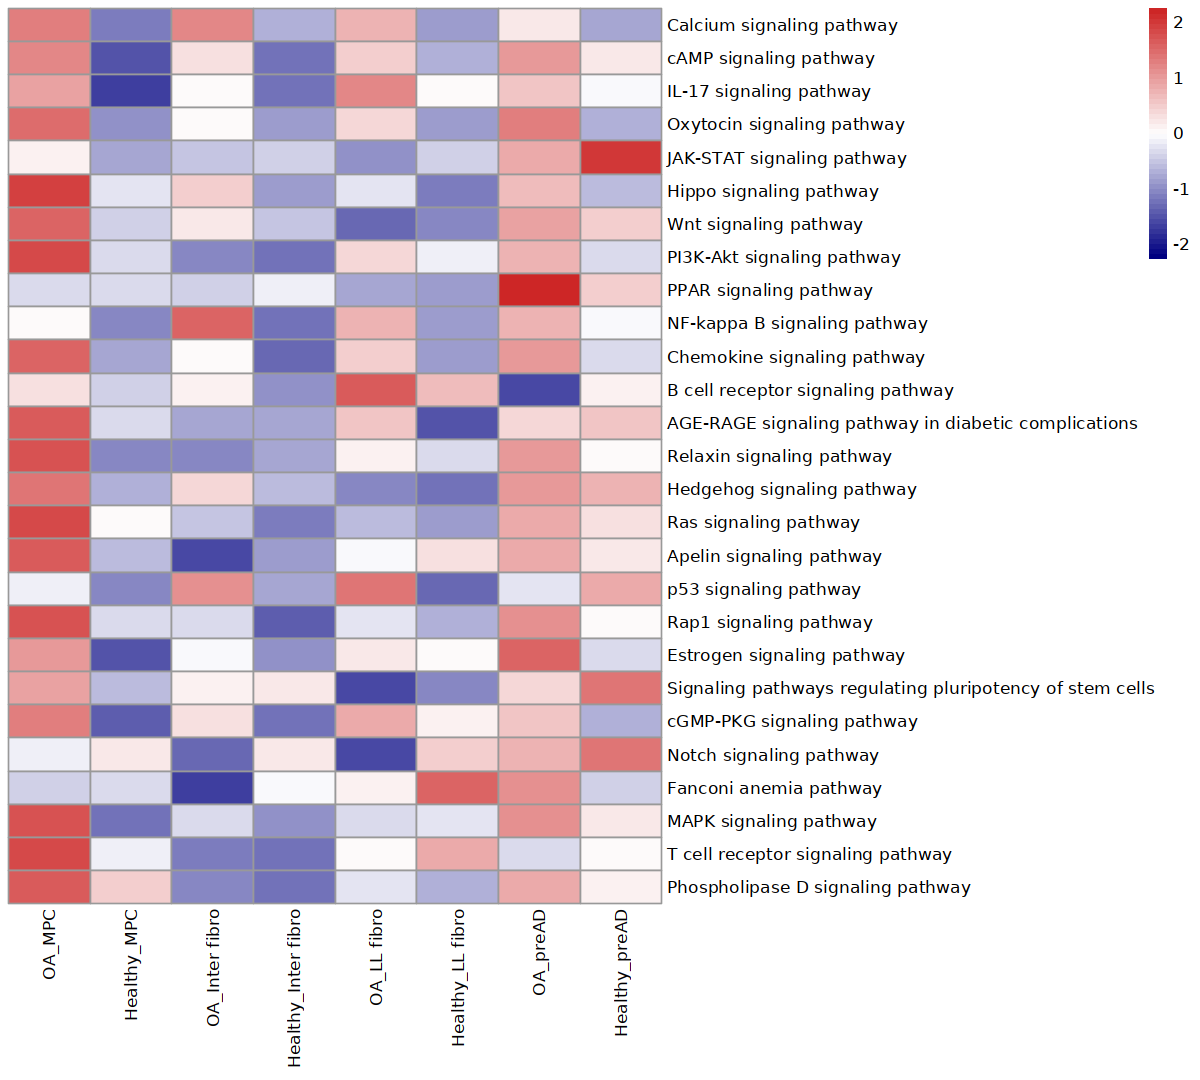

In [38]:
options(repr.plot.width = 10,repr.plot.height = 9)
library(pheatmap)
p2 = pheatmap(as.matrix(gsva.kegg), scale = "row",angle_col = "90",cluster_cols  = FALSE,cluster_rows = FALSE,
        show_column_names = F,
        show_row_names = T,
         color = colorRampPalette(c("navy", "white", "firebrick3"))(50))

### hallmark

In [39]:
library(msigdbr)
msigdbr_species() #列出有的物种
# #选择基因集合
# human_KEGG = msigdbr(species = "Homo sapiens", #物种
#                       category = "C2",
#                      subcategory = "KEGG") %>% 
#   dplyr::select(gs_name,gene_symbol)#这里可以选择gene symbol或者ID
# human_KEGG_Set = human_KEGG %>% split(x = .$gene_symbol, f = .$gs_name)
human_KEGG_Set = hall_list
library(GSVA)
gsva.kegg <- gsva(expr, gset.idx.list = human_KEGG_Set, 
             kcdf="Gaussian",
             method = "gsva",
             parallel.sz=1)
head(gsva.kegg)
# a = c()
# ds = as.data.frame(gsva.kegg) 
# for (i in 1:dim(ds)[2] ){
#     path = ds[ order (-ds[,i]),] %>%  head(5) %>%  rownames()
#     a = unique(c(a,path))
#  }
# gsva.kegg = gsva.kegg[a,]
# options(repr.plot.width = 9,repr.plot.height =  8)

species_name,species_common_name
<chr>,<chr>
Anolis carolinensis,"Carolina anole, green anole"
Bos taurus,"bovine, cattle, cow, dairy cow, domestic cattle, domestic cow, ox, oxen"
Caenorhabditis elegans,NA
Canis lupus familiaris,"dog, dogs"
Danio rerio,"leopard danio, zebra danio, zebra fish, zebrafish"
Drosophila melanogaster,fruit fly
Equus caballus,"domestic horse, equine, horse"
Felis catus,"cat, cats, domestic cat"
Gallus gallus,"bantam, chicken, chickens, Gallus domesticus"


Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."


Estimating GSVA scores for 50 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



,OA_MPC,Healthy_MPC,OA_Inter fibro,Healthy_Inter fibro,OA_LL fibro,Healthy_LL fibro,OA_preAD,Healthy_preAD
HALLMARK_ADIPOGENESIS,-0.09803693,0.027750615,-0.24536959,0.01740274,0.12634999,-0.11153586,0.1009174,0.04819755
HALLMARK_ALLOGRAFT_REJECTION,0.10476940,-0.146188309,0.21359222,-0.17724483,0.09542168,-0.11918877,0.1559184,-0.05103986
HALLMARK_ANDROGEN_RESPONSE,0.05136242,-0.196949301,-0.01278118,-0.06290083,0.09925959,0.17945366,-0.1553406,-0.05842752
HALLMARK_ANGIOGENESIS,0.40540853,0.005113184,0.05081864,-0.37900378,0.16209370,-0.31802241,0.2129547,-0.01135363
HALLMARK_APICAL_JUNCTION,0.36606365,0.004970819,-0.06646779,-0.21975305,0.02566344,-0.16130500,0.1742645,-0.15940348
HALLMARK_APICAL_SURFACE,0.28733480,-0.195623882,0.13701512,-0.08258784,0.06503757,0.07234107,0.1014958,-0.23787405


In [40]:
rownames(gsva.kegg) = gsub('HALLMARK_','',rownames(gsva.kegg))
rownames(gsva.kegg) = tolower(rownames(gsva.kegg))

In [41]:
load('./fib.path2.rda')
gsva.kegg = gsva.kegg[path2,]

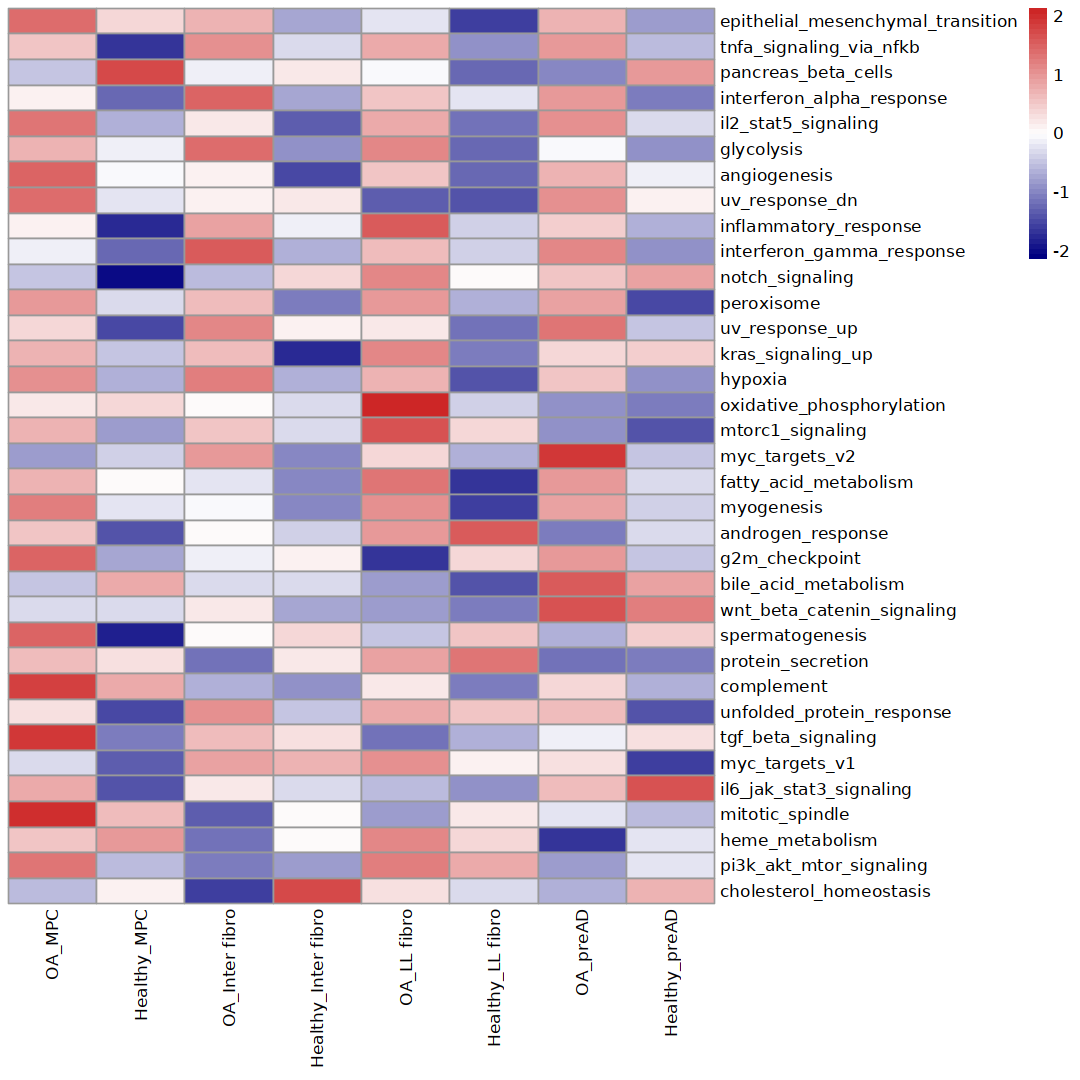

In [43]:
options(repr.plot.width = 9,repr.plot.height = 9)
library(pheatmap)
pheatmap(as.matrix(gsva.kegg), scale = "row",angle_col = "90",cluster_cols  = FALSE,cluster_rows = FALSE,
        show_column_names = F,
        show_row_names = T,
         color = colorRampPalette(c("navy", "white", "firebrick3"))(50))